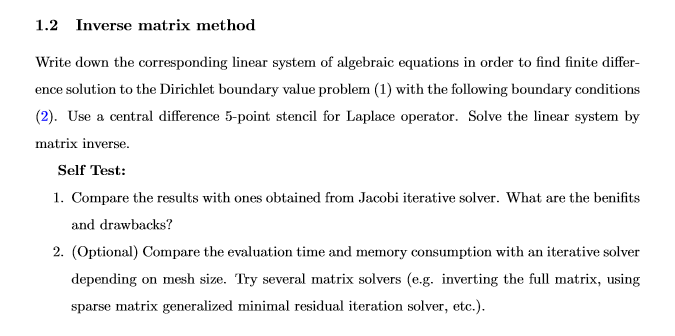

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as lg
from numba import jit

In [2]:
def form_a(lmbd,kdiag,n,m):
    A = sp.diags([lmbd,1,kdiag,1,lmbd],[-n+2,-1,0,1,n-2],shape=[(n-2)*(m-2),(n-2)*(m-2)])
    A = sp.lil_matrix(A)
    for i in range(1,m-2):
        A[i*(n-2)-1,i*(n-2)] = 0
        A[i*(n-2),i*(n-2)-1] = 0
    return sp.csc_matrix(A)

def form_b(n,m,lmbd,BCxa,BCyb):
    B = np.zeros((n-2)*(m-2))
    for i in range(0,m-2):
        B[(i+1)*(n-2)-1] -= BCxa[i+1]
    for i in range(0,n-2):
        B[(m-3)*(n-2)+i] -= lmbd*BCyb[i+1]
    return B

def Solver(a,b,n,m):
    #Mesh & BC
    u = np.zeros((m,n))
    x,y = np.meshgrid(np.linspace(0,a,n),np.linspace(0,b,m))
    u[m-1,:] = np.sin(x[m-1,:])/np.sin(a)
    u[:,n-1] = np.sinh(y[:,n-1])/np.sinh(b)
    #lamda and k for the equation matrix
    lmbd = ((x[0,1] - x[0,0])/(y[1,0] - y[0,0]))**2
    kdiag = -2*(1+lmbd)
    A = form_a(lmbd,kdiag,n,m)
    B = form_b(n,m,lmbd,u[:,n-1],u[m-1,:])
    #Solving
    SolArr = lg.spsolve(A,B)
    #reshape
    u[1:-1,1:-1] = np.reshape(SolArr,(m-2,n-2))
    return u,x,y

Text(0.5, 1.0, 'Error')

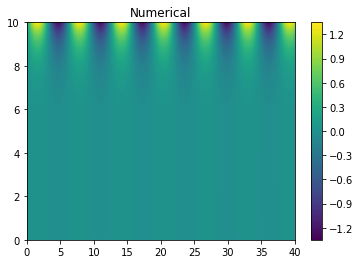

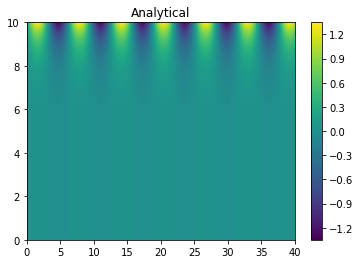

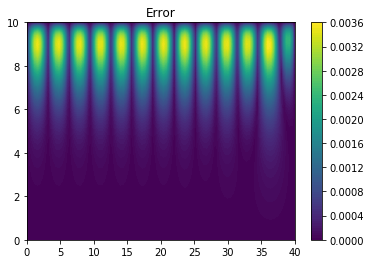

In [3]:
#TestBlock
a = 40
b = 10
n = 101
m = 101

u,x,y = Solver(a,b,n,m)
u_ = (np.sin(x)*np.sinh(y))/(np.sin(a)*np.sinh(b))

fig, ax = plt.subplots()
CS = ax.contourf(x, y, u, 100)
cbar = fig.colorbar(CS)
plt.title('Numerical')

fig, ax = plt.subplots()
CS = ax.contourf(x, y, u_, 100)
cbar = fig.colorbar(CS)
plt.title('Analytical')

fig, ax = plt.subplots()
Err = abs(u_-u)
CS = ax.contourf(x, y, Err, 100)
cbar = fig.colorbar(CS)
plt.title('Error')

In [13]:
a = 10
b = 10
n = 101
m = 101

Mesh = np.arange(10,500,50)
ErrMI = np.zeros_like(Mesh,dtype=np.double)

for i in range(np.size(Mesh)):
    u,x,y = Solver(a,b,Mesh[i],Mesh[i])
    u_ = (np.sin(x)*np.sinh(y))/(np.sin(a)*np.sinh(b)) #AF
    ErrMI[i] = np.sqrt(np.mean((u-u_)**2))


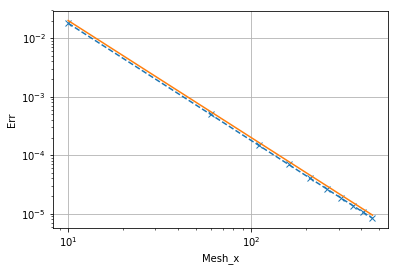

In [15]:
fig, ax = plt.subplots()

plt.plot(Mesh,ErrMI,'--x')
plt.plot(Mesh,2/(Mesh**2))
plt.grid()
plt.xlabel('Mesh_x')
plt.ylabel('Err')
plt.yscale('log')
plt.xscale('log')
